#### [개발 주제 : 길이에 따른 iris 너비 예측 모델 ]
- 데이터셋 : iris.csv
    - 피처/특성/데이터 : 길이 leng|th 
    - 타겟/정답/레이블 : 너비 width
-  합습종류 : 지도학습 - 회귀


[1] 모듈로딩 및 데이터 준비<hr>


In [118]:
## 1-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈듈

In [119]:
## 데이터준비

data_file = '../data/iris.csv'
irishDF = pd.DataFrame(pd.read_csv(data_file, usecols=[0,3], engine='python'))
irishDF

,sepal.length,petal.width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [ ]:
length = irishDF[['sepal.length']]
width = irishDF['petal.width']


[2] 데이터분석 -탐색적 분석

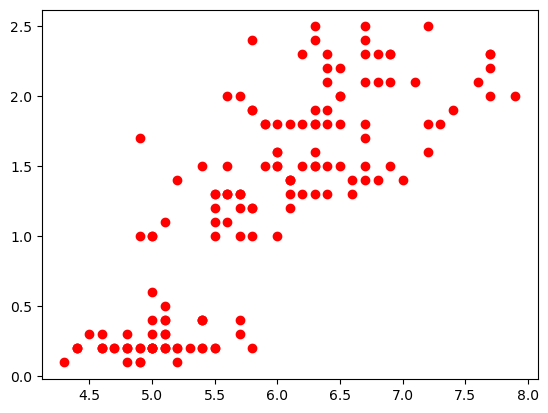

In [121]:
## 무게와 길이의 분포
plt.plot(length, width,'or')
plt.show()

- 길이와 무게는 선형의 분포
- 길이에 따른 무게를 예측하기 위한 알고리즘으로 선형 모델 선정
- 학습 알고리즘 => LinearRegression으로 진행

[3] 학습 진행 <hr>
- 학습 종류 : 지도학습 => 데이터 + 타겟(정답, 레이블) / 회귀Regression(수치 예측)
- 학습 알고리즘: 데이터 분포가 선형을 띄고 있어서 선형회귀로 진행

- 3-1 데이터 셋 준비 => 학습용, 검증용, 테스트용
- 학 습 용 : 모델 학습 즉, 규칙과 패턴 찾기 위해 사용되는 데이터셋
- 검 증 용 : 모델 학습 진행이 제대로 되고 있는지 확인용 데이터셋
- 테스트용 : 학습 완료 후 검사용 데이터셋

- 전체 데이터셋 => 학습용 : 테스트용 = 70:30 또는 80:20

In [122]:
featureDF = length
targetSR = width
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [123]:
## 학습용 : 테스트용 = 7:3
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.3,
                                                    random_state=10)
print(f"X_train => {X_train.shape}, X_test => {X_test.shape}")
print(f"y_train => {y_train.shape}, y_test => {y_test.shape}")

X_train => (105, 1), X_test => (45, 1)
y_train => (105,), y_test => (45,)


In [124]:
## 학습용 : 검증용 = 8:2
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size =0.2,
                                                    random_state=10)

print(f"X_train => {X_train.shape}, X_test => {X_test.shape}, X_val => {X_val.shape}")
print(f"y_train => {y_train.shape}, y_test => {y_test.shape}, y_val => {y_val.shape}")


X_train => (84, 1), X_test => (45, 1), X_val => (21, 1)
y_train => (84,), y_test => (45,), y_val => (21,)


[3-2] 학습진행 => 알고리즘 객체 생성

In [125]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [126]:
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [0.75104308]
lr.intercept_ -3.2076111970381285
X_train = 0.7510430755449257*y_train + -3.2076111970381285


[4] 학습 평가 <hr>
- 모델 성능 평가 : 얼마나 적합한 모델인가 평가
- 손실 계산 : 잔차/오차 발생정도

In [127]:
## [4-1] 모델 성능 평가 ==> 검증데이터
## 결과값 : 0.0 ~ 1.0
## 결과분석 : 1.0에 가까울수록 성능 좋은 모델
lr.score(X_val, y_val)

0.680631088040373

In [128]:
## 4-2 손실 계산 ==> 검증 데이터
## - 결과범위 : 0 ~ 무한대
## - 결과분석: 0에 가까울수록 좋은 모델

## - 모델이 결정한 선형식기반 결과 예측
pre_y = lr.predict(X_val)

# 모델 예측값과 정답의 차이계산
mse = mean_squared_error(y_val, pre_y)
#오차평균

mae = mean_absolute_error(y_val,pre_y)
print(f"mse => {mse}, mae => {mae}")

mse => 0.21349196200838552, mae => 0.40708837482573396


[5] 예측 서비스 <hr>
- 웹 또는 앱에 포함된 모델에서 예측 서비스 진행
- 예측 메서드 : 알고리즘객체변수명.predict(2D_data) ==> 1D 예측갑 반환
    ** 전제조건  >>> 학습 시 진행된 데이터 전처리괒어을 거친 2D_data 를 전달해야함

In [129]:
X_test

,sepal.length
87,6.3
111,6.4
10,5.4
91,6.1
49,5.0
60,5.0
72,6.3
67,5.8
39,5.1
55,5.7


In [130]:
type(X_test)

pandas.core.frame.DataFrame

In [131]:
pre_weight = lr.predict(X_test)

print(f" 예상되는 너비는 {pre_weight}입니다 ")

 예상되는 너비는 [1.52396018 1.59906449 0.84802141 1.37375156 0.54760418 0.54760418
 1.52396018 1.14843864 0.62270849 1.07333433 0.99823003 1.14843864
 0.92312572 0.47249987 0.62270849 1.89948172 1.29864726 0.09697834
 0.62270849 0.54760418 2.12479464 1.59906449 1.44885587 0.39739557
 1.22354295 0.32229126 1.07333433 0.92312572 1.89948172 2.57542048
 1.7492731  1.44885587 2.19989895 1.14843864 1.52396018 0.24718695
 1.82437741 1.97458602 2.57542048 1.97458602 0.54760418 0.54760418
 0.6978128  0.17208264 1.52396018]입니다 


In [132]:
pre_input = pd.DataFrame({'sepal.length':[float(input('입력값: '))]})

pre_width = lr.predict(pre_input)
print(f" 예상되는 너비는 {pre_width}입니다 ")

ValueError: could not convert string to float: ''